In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from math import exp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sklearn.neighbors._base

# Ignore warning messages.
warnings.filterwarnings("ignore") 

# Read data from the csv file and convert it into a dataframe.
df = pd.read_csv('SelectIndicators_07-18-13_07-18-23.csv')
df.drop(columns='Row Labels', axis=1,inplace=True)
df.head()


,"CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN","CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN","DEPTH, SECCHI DISK DEPTH","NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)",ORTHOPHOSPHATE,PHOSPHORUS,"TOTAL NITROGEN, MIXED FORMS",TURBIDITY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,106.299215,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,82.677162,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,59.055118,NaN,NaN,NaN,NaN,NaN


In [29]:
df.dropna(axis=0,how='all',inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636402 entries, 2 to 716433
Data columns (total 8 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN                       141750 non-null  float64
 1   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN                     81350 non-null   float64
 2   DEPTH, SECCHI DISK DEPTH                                      403410 non-null  float64
 3   NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)  67876 non-null   float64
 4   ORTHOPHOSPHATE                                                108795 non-null  float64
 5   PHOSPHORUS                                                    230497 non-null  float64
 6   TOTAL NITROGEN, MIXED FORMS                                   10068 non-null   float64
 7   TURBIDITY                                                

In [30]:

#Eliminating rows with nan
#df = df.replace(np.nan,0,regex=True)
#df = df[df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'].between(0, 6900)]
#df = df[df['PHOSPHORUS'].between(0, 1000)]
#df = df[df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'].between(0, 500)]
#df = df[df['DEPTH, SECCHI DISK DEPTH'].between(0, 600)]
#df = df[df['CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN'].between(0, 400)]
#df.drop(columns=['ORTHOPHOSPHATE','TOTAL NITROGEN, MIXED FORMS','TURBIDITY'],axis=1,inplace=True)
df.drop(columns='TOTAL NITROGEN, MIXED FORMS', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636402 entries, 2 to 716433
Data columns (total 7 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN                       141750 non-null  float64
 1   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN                     81350 non-null   float64
 2   DEPTH, SECCHI DISK DEPTH                                      403410 non-null  float64
 3   NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)  67876 non-null   float64
 4   ORTHOPHOSPHATE                                                108795 non-null  float64
 5   PHOSPHORUS                                                    230497 non-null  float64
 6   TURBIDITY                                                     230268 non-null  float64
dtypes: float64(7)
memory usage: 38.8 MB


Testing methods to impute missing data

In [23]:
#Resolve dependency naming issue
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
#Miss Forest
from missingpy import MissForest


imputer = MissForest()
df_MF = imputer.fit_transform(df)
df_MF = pd.DataFrame(df_MF, columns = df.columns).round(1)

Iteration: 0
Iteration: 1


In [36]:
#KNN Imputer
from sklearn.impute import KNNImputer


imputer = KNNImputer() 
df_KNN = imputer.fit_transform(df)
df_KNN = pd.DataFrame(df_KNN, columns = df.columns).round(1)


KeyboardInterrupt: 

In [ ]:
#X_train_MF.info()
#X_train_MF.head()
#df.plot(kind='scatter',y='NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)',x='PHOSPHORUS')


<Axes: xlabel='PHOSPHORUS', ylabel='NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'>

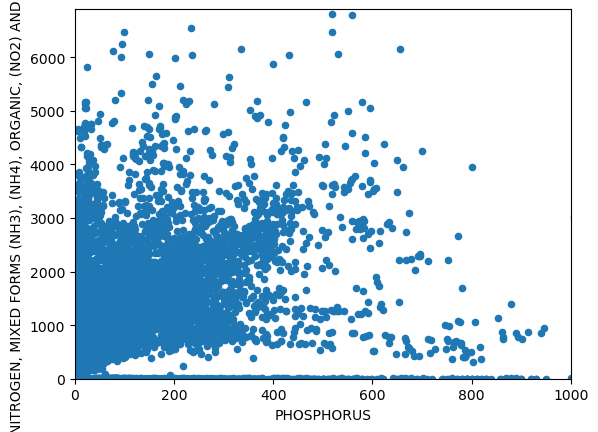

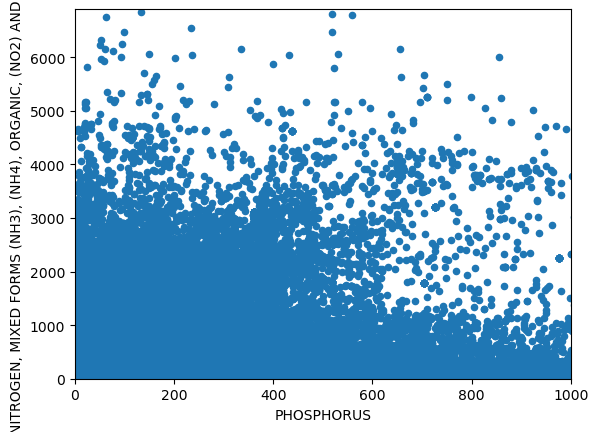

In [31]:
#Nitrogen vs Phosphorus Plot
df.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'PHOSPHORUS',ylim=(0,6900),xlim=(0,1000))
df_MF.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'PHOSPHORUS',ylim=(0,6900),xlim=(0,1000))
df_KNN.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'PHOSPHORUS',ylim=(0,6900),xlim=(0,1000))



<Axes: xlabel='CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN', ylabel='NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'>

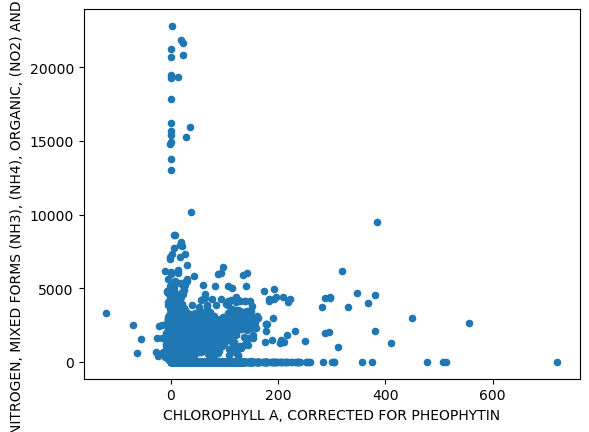

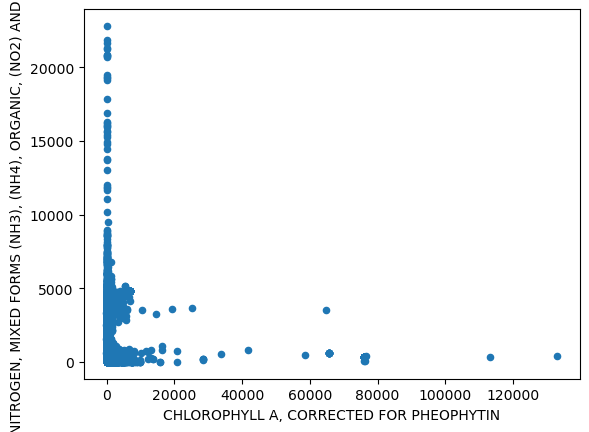

In [32]:
#Nitrogen vs Chlorophyll A, corrected plot
df.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN')
df_MF.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN')
df_KNN.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'PHOSPHORUS',ylim=(0,6900),xlim=(0,1000))


<Axes: xlabel='DEPTH, SECCHI DISK DEPTH', ylabel='NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'>

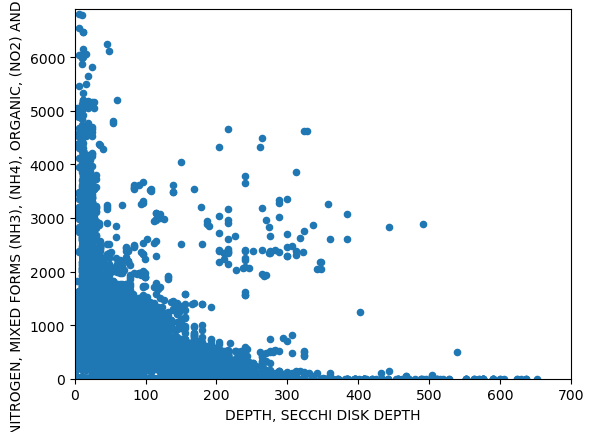

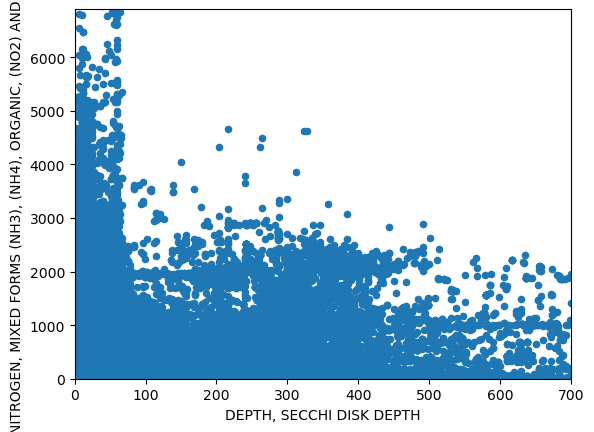

In [35]:
#Nitrogen vs Secchi Disk Depth
df.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'DEPTH, SECCHI DISK DEPTH',ylim=(0,6900),xlim=(0,700))
df_MF.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'DEPTH, SECCHI DISK DEPTH',ylim=(0,6900),xlim=(0,700))
df_KNN.plot(kind='scatter',y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'DEPTH, SECCHI DISK DEPTH',ylim=(0,6900),xlim=(0,700))


In [37]:
df = df_MF

In [38]:
#Making train and test sets only from important features
X=df.loc[:,df.columns != 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']     
X.info()
Y=df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']  
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636402 entries, 0 to 636401
Data columns (total 6 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN    636402 non-null  float64
 1   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN  636402 non-null  float64
 2   DEPTH, SECCHI DISK DEPTH                   636402 non-null  float64
 3   ORTHOPHOSPHATE                             636402 non-null  float64
 4   PHOSPHORUS                                 636402 non-null  float64
 5   TURBIDITY                                  636402 non-null  float64
dtypes: float64(6)
memory usage: 29.1 MB


In [39]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 97.82%
The accuracy for the test set is 84.45%


In [40]:
important_features = pd.Series(data=model.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

DEPTH, SECCHI DISK DEPTH                     0.293611
CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN    0.183537
ORTHOPHOSPHATE                               0.155706
PHOSPHORUS                                   0.147686
TURBIDITY                                    0.110936
CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN      0.108525
dtype: float64


In [41]:
from sklearn.neighbors import KNeighborsRegressor


model = KNeighborsRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 78.34%
The accuracy for the test set is 66.26%


In [42]:
from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 99.88%
The accuracy for the test set is 69.93%


In [ ]:
from sklearn import svm


model = svm.SVR()
model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

Scaling Train and Test Sets

In [43]:
#Because we separated the input and output previously, if scale them separately
#it can cause inaccurate results. The code below addresses the issue
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
print(X_train_scaled.mean(axis=0))
print(X_test_scaled.mean(axis=0))

CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN      2.419084e-19
CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN    9.694945e-18
DEPTH, SECCHI DISK DEPTH                     7.220036e-18
ORTHOPHOSPHATE                              -1.972484e-18
PHOSPHORUS                                  -1.821757e-17
TURBIDITY                                   -2.701931e-17
dtype: float64
CHLOROPHYLL A, CORRECTED FOR PHEOPHYTIN      0.000366
CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN    0.000332
DEPTH, SECCHI DISK DEPTH                     0.002680
ORTHOPHOSPHATE                               0.003493
PHOSPHORUS                                   0.000880
TURBIDITY                                   -0.000482
dtype: float64


In [44]:
#Scaled RF accuracy
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor()
#random_state=True,warm_start=True,criterion='absolute_error',max_depth=100

model.fit(X_train_scaled, Y_train)
train_accuracy = model.score(X_train_scaled, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 97.81%
The accuracy for the test set is 84.47%


Cross-validation

In [45]:
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score

clf = RandomForestRegressor()

k_folds = KFold(n_splits = 10)
shuffle_split = ShuffleSplit(n_splits=10,test_size=.2)

scores = cross_val_score(clf, X, Y, cv = shuffle_split)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

KeyboardInterrupt: 